# Rank and Classify Features of a Smart Phone

### Dataset information

* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth (1) or not (0)
* clock_speed - speed at which microprocessor executes instructions
* dual_sim - Has dual sim support (1) or not (0)
* fc - Front Camera mega pixels
* four_g - Has 4G (1) or not (0)
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Mega Bytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm
* talk_time - longest time that a single battery charge will last when you are
* three_g - Has 3G (1) or not (0)
* touch_screen - Has touch screen (1) or not (0)
* wifi - Has wifi (1) or not (0)
* price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Reading dataset

In [2]:
df=pd.read_csv(r"C:\Users\rakhi\OneDrive\Desktop\MobileTrain.csv")

In [3]:
#first five rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#last five rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Data description

In [5]:
df.shape

(2000, 21)

There are 2000 rows and 21 columns.

In [6]:
#datatypes of each column
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
#unique values in each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [8]:
#statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Data Cleaning

#### Missing value handling

In [9]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values.

#### Duplicate handling

In [10]:
df.duplicated().any()

False

There are no duplicates.

#### Outlier handling

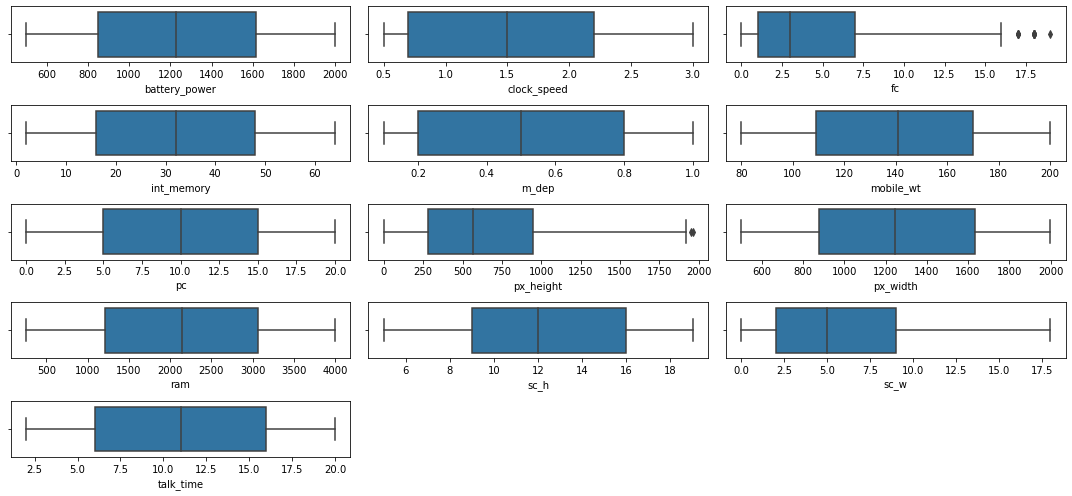

In [11]:
num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num_col[i]],orient='v')
    plt.tight_layout()

There are outliers in the columns 'fc' and 'px_height'. Since these are genuine values we need not replace or remove it.

### EDA

#### Pie chart

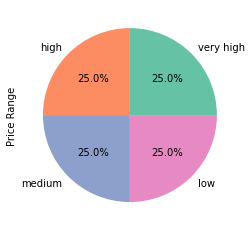

In [12]:
labels=['very high','high','medium','low']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['price_range'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Price Range')
plt.show()

The dataset is balanced.

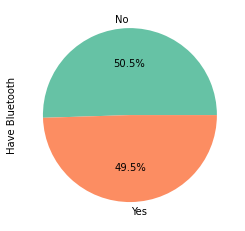

In [13]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['blue'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have Bluetooth')
plt.show()

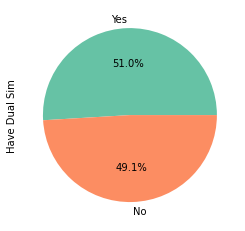

In [14]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['dual_sim'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have Dual Sim')
plt.show()

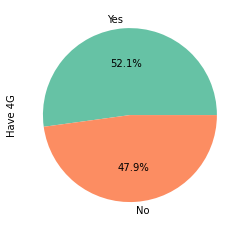

In [15]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['four_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have 4G')
plt.show()

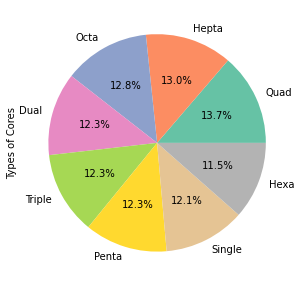

In [16]:
labels=['Quad','Hepta','Octa','Dual','Triple','Penta','Single','Hexa']
plt.figure(figsize=(5,5))
color=sns.color_palette("Set2")
df['n_cores'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(5,5))
plt.ylabel('Types of Cores')
plt.show()

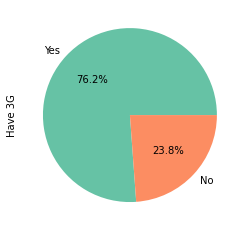

In [17]:
labels=['Yes','No']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['three_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have 3G')
plt.show()

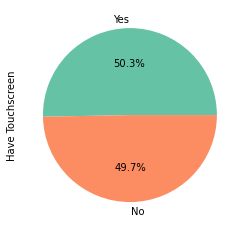

In [18]:
labels=['Yes','No']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['touch_screen'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have Touchscreen')
plt.show()

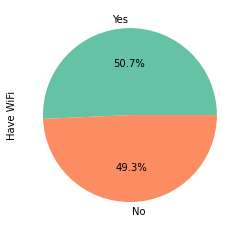

In [19]:
labels=['Yes','No']
plt.figure(figsize=(4,4))
color=sns.color_palette("Set2")
df['wifi'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,colors=color,figsize=(4,4))
plt.ylabel('Have WiFi')
plt.show()

* We can see that half of the phones have bluetooth, dual sim, 4G, touchscreen and wifi.
* Almost three-fourth of the phones have 3G.
* The different types of cores spread out evenly.

#### Countplot

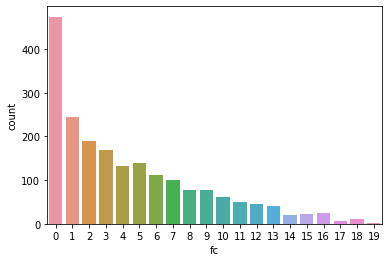

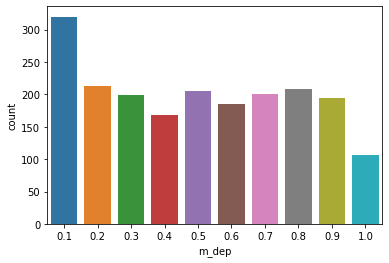

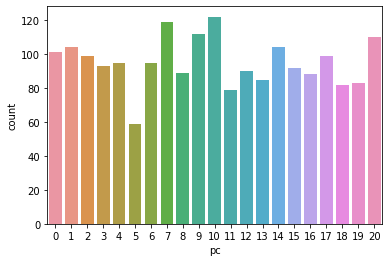

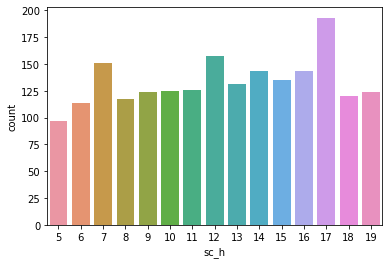

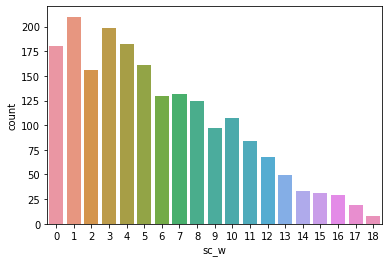

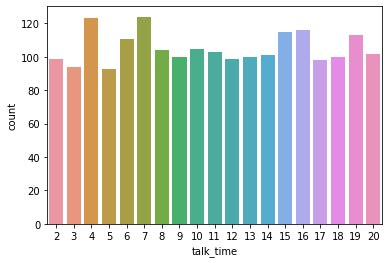

In [20]:
for i in num_col:
    if (df[i].nunique())<=25:
        sns.countplot(x=df[i])
        plt.show()

* Majority of phones in this dataset have a front camera. Only a quarter of the phone in this dataset doesn't have front camera.
* Almost 6 % of phones in this dataset doens't have camera.
* Talktime is evenly spread out.

#### Histplot

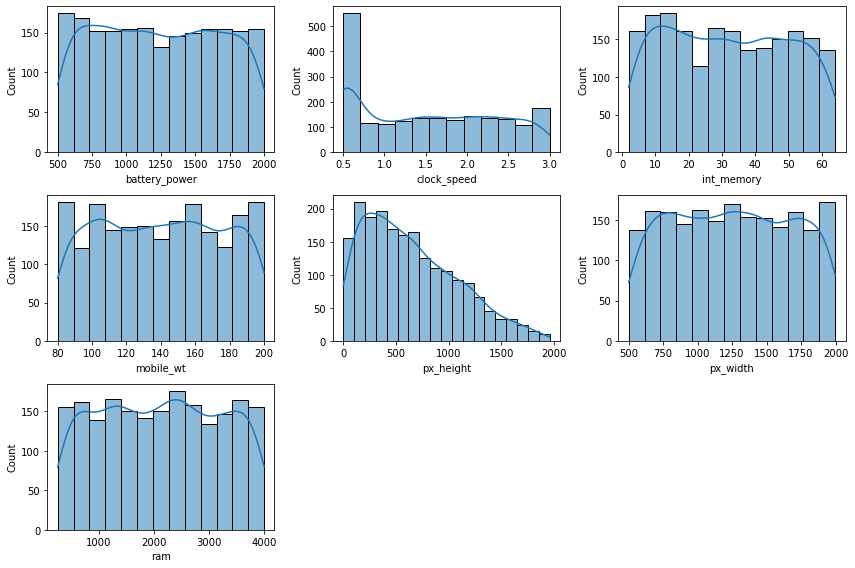

In [21]:
c=df[['battery_power','clock_speed','int_memory','mobile_wt','px_height','px_width','ram']]
plt.figure(figsize=(12,8))
for i, j in enumerate(c):
    plt.subplot(3,3, i+1)
    sns.histplot( df[j], kde = True)
plt.tight_layout()    

* the pixel height distribution is right skewed.
* others have multimodal distribution.

#### Line plot

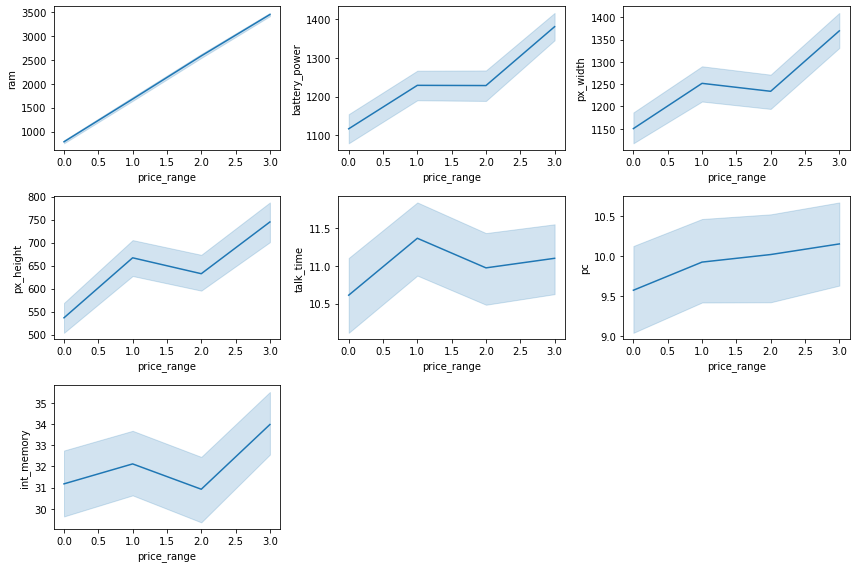

In [22]:
a=df[['ram','battery_power','px_width','px_height','talk_time','pc','int_memory']]
plt.figure(figsize=(12,8))
for i, j in enumerate(a):
    plt.subplot(3,3, i+1)
    sns.lineplot(y=df[j],x=df["price_range"])
plt.tight_layout()

* The higher the price range higher the average ram size.
* We can see that the higher the price range it tend to have a higher battery power except on the price range 1 to 2. It seems that from price range 1 to 2 there's no significance difference in the average  battery power 
* The price range of 2 and 3 seems to have products with almost same battery power.
* The price range of 0 has more products with lower pixel width and pixel height while the highest price range has more products with higher pixel width and pixel height.
* It seems that talk time doesn't really affect the price range.
* Higher price range has a higher megapixel primary camera.

#### Heatmap

<AxesSubplot:>

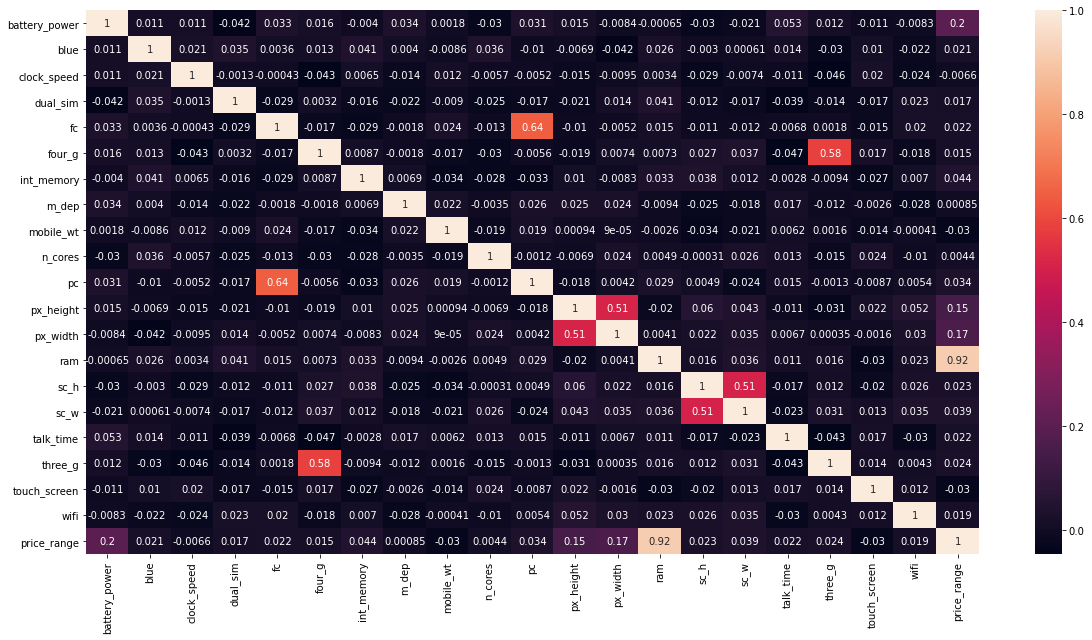

In [23]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

* Darker shades represent low correlation
* All features exibit low correlation with each other.
* 'ram' is highly correlated with price range.
* None of the features are negatively correlated.

### Ranking all features

In [24]:
df1=df.copy()

In [25]:
#ranking each feature separately
df1["rank_by_battery"] = df1["battery_power"].rank(method="dense",ascending=False)
df1["rank_by_blueooth"] = df1["blue"].rank(method="dense",ascending=False)
df1["rank_by_clockspeed"] = df1["clock_speed"].rank(method="dense",ascending=False)
df1["rank_by_DualSIM"] = df1["dual_sim"].rank(method="dense",ascending=False)
df1["rank_by_fc"] = df1["fc"].rank(method="dense",ascending=False)
df1["rank_by_4G"] = df1["four_g"].rank(method="dense",ascending=False)
df1["rank_by_InternalMemory"] = df1["int_memory"].rank(method="dense",ascending=False)
df1["rank_by_mdep"] = df1["m_dep"].rank(method="dense",ascending=False)
df1["rank_by_weight"] = df1["mobile_wt"].rank(method="dense",ascending=True)
df1["rank_by_ncores"] = df1["n_cores"].rank(method="dense",ascending=False)
df1["rank_by_pc"] = df1["pc"].rank(method="dense",ascending=False)
df1["rank_by_height"] = df1["px_height"].rank(method="dense",ascending=False)
df1["rank_by_width"] = df1["px_width"].rank(method="dense",ascending=False)
df1["rank_by_ram"] = df1["ram"].rank(method="dense",ascending=False)
df1["rank_by_sch"] = df1["sc_h"].rank(method="dense",ascending=False)
df1["rank_by_scw"] = df1["sc_w"].rank(method="dense",ascending=False)
df1["rank_by_talktime"] = df1["talk_time"].rank(method="dense",ascending=False)
df1["rank_by_3G"] = df1["three_g"].rank(method="dense",ascending=False)
df1["rank_by_touchscreen"] = df1["touch_screen"].rank(method="dense",ascending=False)
df1["rank_by_wifi"] = df1["wifi"].rank(method="dense",ascending=False)
df1["rank_by_price"] = df1["price_range"].rank(method="dense")

In [26]:
#creating a new dataframe with ranks
RankedDataset = df1.iloc[:,21:]
RankedDataset.head()

,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,...,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi,rank_by_price
0,839.0,2.0,9.0,2.0,19.0,2.0,58.0,5.0,109.0,7.0,...,1119.0,923.0,599.0,11.0,12.0,2.0,2.0,2.0,1.0,2.0
1,712.0,1.0,26.0,1.0,20.0,1.0,12.0,4.0,57.0,6.0,...,399.0,10.0,564.0,3.0,16.0,14.0,1.0,1.0,2.0,3.0
2,1046.0,1.0,26.0,1.0,18.0,1.0,24.0,2.0,66.0,4.0,...,175.0,208.0,578.0,9.0,17.0,12.0,1.0,1.0,2.0,3.0
3,1006.0,1.0,6.0,2.0,20.0,2.0,55.0,3.0,52.0,3.0,...,202.0,155.0,507.0,4.0,11.0,10.0,1.0,2.0,2.0,3.0
4,140.0,1.0,19.0,2.0,7.0,1.0,21.0,5.0,62.0,7.0,...,209.0,592.0,1063.0,12.0,17.0,6.0,1.0,1.0,2.0,2.0


In [27]:
#sorting rank dataset
df1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,829.0,575.0,1205.0,6.0,12.0,18.0,1.0,1.0,2.0,1.0
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,1040.0,1087.0,1207.0,5.0,14.0,11.0,1.0,2.0,1.0,1.0
419,914,1,0.9,0,2,0,4,0.8,100,2,...,979.0,372.0,1320.0,9.0,12.0,16.0,1.0,1.0,2.0,1.0
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,997.0,881.0,1332.0,13.0,13.0,13.0,2.0,2.0,2.0,1.0
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,535.0,358.0,1549.0,6.0,15.0,4.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,920.0,714.0,65.0,3.0,7.0,12.0,1.0,1.0,1.0,4.0
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,941.0,33.0,217.0,6.0,14.0,9.0,1.0,1.0,2.0,4.0
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,586.0,841.0,6.0,3.0,5.0,13.0,1.0,1.0,1.0,4.0
956,862,0,2.3,0,9,1,6,0.1,107,8,...,452.0,19.0,239.0,11.0,15.0,12.0,1.0,1.0,1.0,4.0


### Splitting the dataset

In [28]:
x= df.drop('price_range',axis=1)
y=df['price_range']

### Scaling

In [29]:
sc = StandardScaler()
x = sc.fit_transform(x)

### Train-Test Splitting

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

### Model Building

### Naive Bayes Classifier

In [31]:
#creating an instance
gb = GaussianNB()
#fitting
gb.fit(x_train, y_train)

GaussianNB()

In [32]:
#predicting
gb_pred = gb.predict(x_test)

In [33]:
gba=(accuracy_score(y_test,gb_pred))*100
print("Accuracy of Naive Bayes Classifier is: {}%".format(gba))

Accuracy of Naive Bayes Classifier is: 79.75%


##### Classification Report

In [34]:
target_names=['Low cost','Medium cost','High cost','Very high cost']
print(classification_report(y_test,gb_pred, target_names=target_names))

                precision    recall  f1-score   support

      Low cost       0.90      0.90      0.90       105
   Medium cost       0.77      0.68      0.72        91
     High cost       0.64      0.77      0.70        92
Very high cost       0.88      0.81      0.85       112

      accuracy                           0.80       400
     macro avg       0.80      0.79      0.79       400
  weighted avg       0.81      0.80      0.80       400



In [35]:
print("Train Accuracy:",gb.score(x_train, y_train))
print("Test Accuracy:",gb.score(x_test, y_test))

Train Accuracy: 0.819375
Test Accuracy: 0.7975


##### Confusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix of Naive Bayes'}>

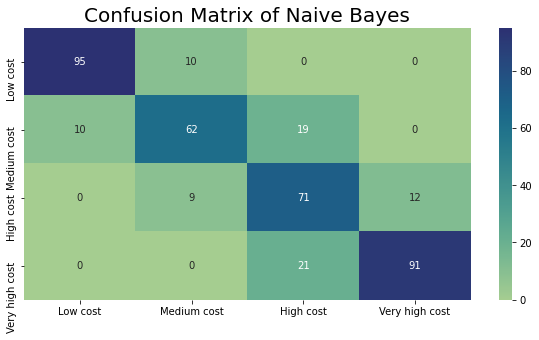

In [36]:
cm_GB=confusion_matrix(y_test,gb_pred)
cm_df_GB = pd.DataFrame(cm_GB, index=['Low cost','Medium cost','High cost','Very high cost'], columns=['Low cost','Medium cost','High cost','Very high cost'])
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix of Naive Bayes",fontsize=20)
sns.heatmap(cm_df_GB, annot=True, fmt="d",cmap="crest")

### Random Forest

In [37]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
rf_pred=rf.predict(x_test)

In [39]:
rfa=(accuracy_score(y_test,rf_pred))*100
print("Accuracy of Random Forest Classifier is: {}%".format(rfa))

Accuracy of Random Forest Classifier is: 87.75%


##### Classification Report

In [40]:
print(classification_report(y_test,rf_pred, target_names=target_names))

                precision    recall  f1-score   support

      Low cost       0.94      0.96      0.95       105
   Medium cost       0.85      0.84      0.84        91
     High cost       0.78      0.82      0.80        92
Very high cost       0.93      0.88      0.90       112

      accuracy                           0.88       400
     macro avg       0.87      0.87      0.87       400
  weighted avg       0.88      0.88      0.88       400



In [41]:
print("Train Accuracy:",rf.score(x_train, y_train))
print("Test Accuracy:",rf.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.8775


#### Hyperparameter Tuning

In [42]:
max_features_range = np.arange(7,9,1)
n_estimators_range = np.arange(600,1100,200)
max_depth_range=np.arange(20,40,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range,max_depth=max_depth_range)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [43]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([20, 30]),
                         'max_features': array([7, 8]),
                         'n_estimators': array([ 600,  800, 1000])})

In [44]:
print("The best parameters are %s with a score of %0.2f" % (rf_grid.best_params_, rf_grid.best_score_))

The best parameters are {'max_depth': 30, 'max_features': 8, 'n_estimators': 600} with a score of 0.89


In [45]:
rf_pred_new=rf_grid.predict(x_test)

rf_acc_new=accuracy_score(y_test,rf_pred_new)*100
print('Accuracy of Random forest classifier after hyperparameter tuning is',rf_acc_new,'.')

Accuracy of Random forest classifier after hyperparameter tuning is 91.75 .


##### Classification Report After Tuning

In [46]:
print(classification_report(y_test,rf_pred_new, target_names=target_names))

                precision    recall  f1-score   support

      Low cost       0.96      0.95      0.96       105
   Medium cost       0.89      0.92      0.91        91
     High cost       0.87      0.87      0.87        92
Very high cost       0.94      0.92      0.93       112

      accuracy                           0.92       400
     macro avg       0.92      0.92      0.92       400
  weighted avg       0.92      0.92      0.92       400



##### Confusion Matrix After Tuning

<AxesSubplot:title={'center':'Confusion Matrix of Random Forest Classifier after hyperparameter tuning'}>

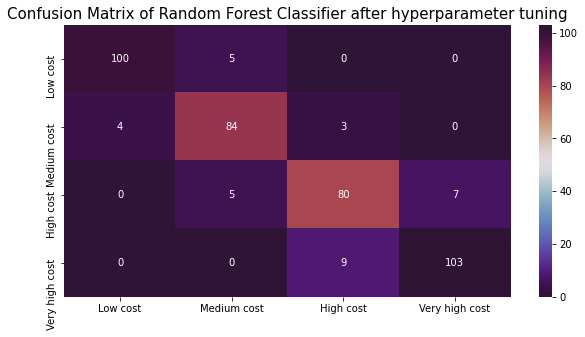

In [47]:
cm_rfnew=confusion_matrix(y_test,rf_pred_new)
cm_df_rfnew = pd.DataFrame(cm_rfnew,index=['Low cost','Medium cost','High cost','Very high cost'], columns=['Low cost','Medium cost','High cost','Very high cost'])
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix of Random Forest Classifier after hyperparameter tuning",fontsize=15)
sns.heatmap(cm_df_rfnew, annot=True, fmt="d",cmap='twilight_shifted')

### Decision Tree

In [48]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
dt_pred=dt.predict(x_test)

In [50]:
dta=(accuracy_score(dt_pred,y_test))*100
print("Accuracy of Decision Tree Classifier is: {}%".format(dta))

Accuracy of Decision Tree Classifier is: 82.0%


##### Classification Report

In [51]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       105
           1       0.73      0.82      0.77        91
           2       0.74      0.68      0.71        92
           3       0.88      0.88      0.88       112

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.82      0.82       400



In [52]:
print("Train Accuracy:",dt.score(x_train, y_train))
print("Test Accuracy:",dt.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.82


#### Hyperparametric Tuning

In [53]:
params = {'min_samples_leaf': [30, 40, 50, 100],'criterion': ["gini", "entropy"]}

dt_cv = GridSearchCV(estimator=dt,param_grid=params)

In [54]:
dt_cv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [30, 40, 50, 100]})

In [55]:
print("The best parameters are %s with a score of %0.2f" % (dt_cv.best_params_, dt_cv.best_score_))

The best parameters are {'criterion': 'entropy', 'min_samples_leaf': 30} with a score of 0.80


In [56]:
dt_pred_new=dt_cv.predict(x_test)

dt_acc_new=accuracy_score(y_test,dt_pred_new)*100
print('Accuracy of Decision tree classifier is','',dt_acc_new,'.')

Accuracy of Decision tree classifier is  85.25 .


##### Classification Report After Tuning

In [57]:
print(classification_report(y_test,dt_pred_new,target_names=target_names))

                precision    recall  f1-score   support

      Low cost       0.92      0.90      0.91       105
   Medium cost       0.79      0.82      0.81        91
     High cost       0.81      0.74      0.77        92
Very high cost       0.87      0.93      0.90       112

      accuracy                           0.85       400
     macro avg       0.85      0.85      0.85       400
  weighted avg       0.85      0.85      0.85       400



##### Confusion Matrix After Tuning

<AxesSubplot:title={'center':'Confusion Matrix of Decision Tree After Hyperparameter Tuning'}>

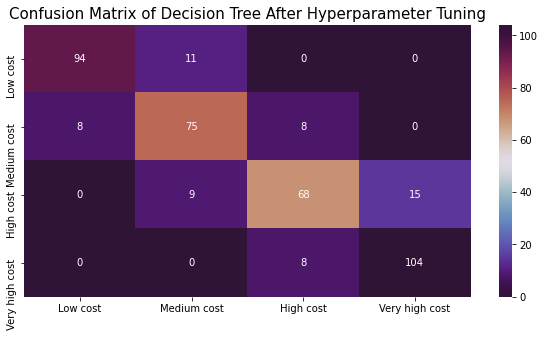

In [58]:
cm_dtnew=confusion_matrix(y_test,dt_pred_new)
cm_df_dtnew = pd.DataFrame(cm_dtnew,index=['Low cost','Medium cost','High cost','Very high cost'], columns=['Low cost','Medium cost','High cost','Very high cost'])
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix of Decision Tree After Hyperparameter Tuning",fontsize=15)
sns.heatmap(cm_df_dtnew, annot=True, fmt="d",cmap="twilight_shifted")

### KNN

In [59]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
kn_pred=kn.predict(x_test)

In [61]:
kna=(accuracy_score(kn_pred,y_test))*100
print("Accuracy of KNN Classifier is: {}%".format(kna))

Accuracy of KNN Classifier is: 53.0%


In [62]:
print("Train Accuracy:",kn.score(x_train, y_train))
print("Test Accuracy:",kn.score(x_test, y_test))

Train Accuracy: 0.696875
Test Accuracy: 0.53


In [63]:
print(classification_report(y_test,kn_pred, target_names=target_names))

                precision    recall  f1-score   support

      Low cost       0.70      0.72      0.71       105
   Medium cost       0.35      0.45      0.39        91
     High cost       0.36      0.38      0.37        92
Very high cost       0.80      0.54      0.64       112

      accuracy                           0.53       400
     macro avg       0.55      0.52      0.53       400
  weighted avg       0.57      0.53      0.54       400



#### Hyperparametric Tuning

In [64]:
grid_params = {'n_neighbors':[20,40,60,80], 'weights':['uniform','distance'], 'metric':['minkowski','euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3)

In [65]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [20, 40, 60, 80],
                         'weights': ['uniform', 'distance']})

In [66]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'metric': 'manhattan', 'n_neighbors': 80, 'weights': 'distance'} with a score of 0.70


In [67]:
knn_pred=grid.predict(x_test)

knn_acc=accuracy_score(y_test,knn_pred)*100
print('The accuracy of KNN classifier is',knn_acc,'.')

The accuracy of KNN classifier is 73.75 .


##### Classification Report

In [68]:
print(classification_report(y_test,knn_pred, target_names=target_names))

                precision    recall  f1-score   support

      Low cost       0.84      0.84      0.84       105
   Medium cost       0.66      0.65      0.65        91
     High cost       0.58      0.72      0.64        92
Very high cost       0.89      0.73      0.80       112

      accuracy                           0.74       400
     macro avg       0.74      0.73      0.73       400
  weighted avg       0.75      0.74      0.74       400



##### Confusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix of KNN'}>

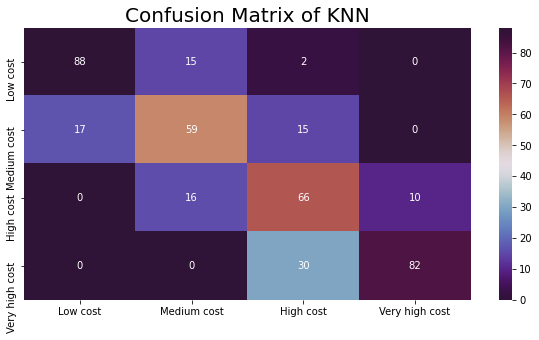

In [69]:
cm_KN=confusion_matrix(y_test,knn_pred)
cm_df_KN = pd.DataFrame(cm_KN, index=['Low cost','Medium cost','High cost','Very high cost'], columns=['Low cost','Medium cost','High cost','Very high cost'])
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix of KNN",fontsize=20)
sns.heatmap(cm_df_KN, annot=True, fmt="d",cmap="twilight_shifted")

### SVC

In [70]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [71]:
sv_pred=sv.predict(x_test)

In [72]:
sva=(accuracy_score(sv_pred,y_test))*100
print("Accuracy of SVC is: {}%".format(sva))

Accuracy of SVC is: 89.25%


##### Classification Report

In [73]:
print(classification_report(y_test,sv_pred, target_names=target_names))

                precision    recall  f1-score   support

      Low cost       0.95      0.93      0.94       105
   Medium cost       0.80      0.89      0.84        91
     High cost       0.84      0.82      0.83        92
Very high cost       0.96      0.92      0.94       112

      accuracy                           0.89       400
     macro avg       0.89      0.89      0.89       400
  weighted avg       0.90      0.89      0.89       400



In [74]:
print("Train Accuracy:",sv.score(x_train, y_train))
print("Test Accuracy:",sv.score(x_test, y_test))

Train Accuracy: 0.9825
Test Accuracy: 0.8925


##### Confusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix of SVC'}>

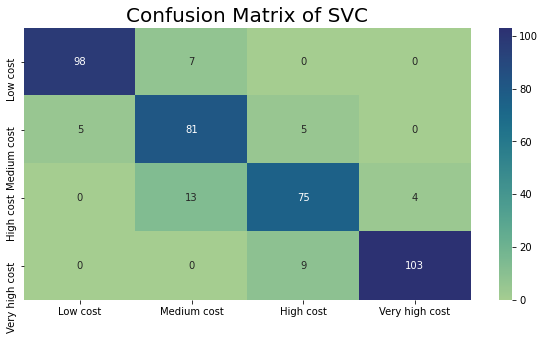

In [75]:
cm_SV=confusion_matrix(y_test,sv_pred)
cm_df_SV = pd.DataFrame(cm_SV, index=['Low cost','Medium cost','High cost','Very high cost'], columns=['Low cost','Medium cost','High cost','Very high cost'])
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix of SVC",fontsize=20)
sns.heatmap(cm_df_SV, annot=True, fmt="d",cmap="crest")

### Comparision of Accuracy

<AxesSubplot:xlabel='model', ylabel='accuracy'>

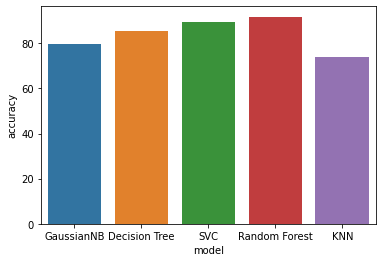

In [76]:
classifiers=["GaussianNB","Decision Tree","SVC","Random Forest",'KNN']
accuracy=[gba,dt_acc_new,sva,rf_acc_new,knn_acc]
f1_score = [0.79,0.83,0.89,0.91,0.73]
df_af=pd.DataFrame({'model':classifiers,"accuracy":accuracy,"f1-score":f1_score})
sns.barplot(data=df_af,x="model",y="accuracy")

<AxesSubplot:xlabel='model', ylabel='f1-score'>

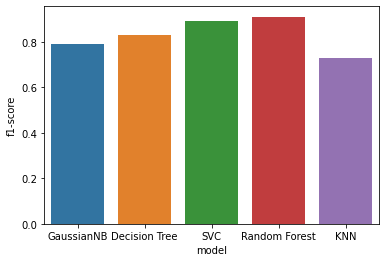

In [77]:
sns.barplot(data=df_af,x="model",y="f1-score")

#### Inference

* Random forest classifier has the highest accuracy of 91.25 anf f1-score of 0.91.
* This is followed by SVC with accuracy 89.25 and f1-score 0.89.
* KNN has the least accuracy of 65.5% and f1-score 0.73.

### Predict Test Data

In [78]:
# Loading the test dataset
test_data=pd.read_csv(r"C:\Users\rakhi\OneDrive\Desktop\MobileTest.csv")
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [79]:
test_data.shape

(1000, 21)

There are 1000 rows and 21 columns.

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [81]:
# Dropping irrelevant columns
test_data.drop('id',axis=1,inplace=True)

In [82]:
test_data.nunique()

battery_power    721
blue               2
clock_speed       26
dual_sim           2
fc                20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
pc                21
px_height        694
px_width         743
ram              872
sc_h              15
sc_w              19
talk_time         19
three_g            2
touch_screen       2
wifi               2
dtype: int64

In [83]:
test_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

### Missing Value Handling

In [84]:
test_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

There are no null values in the dataset.

### Duplicate Values Handling

In [85]:
test_data.duplicated().any()

False

There are no duplicates.

### Outlier Detection

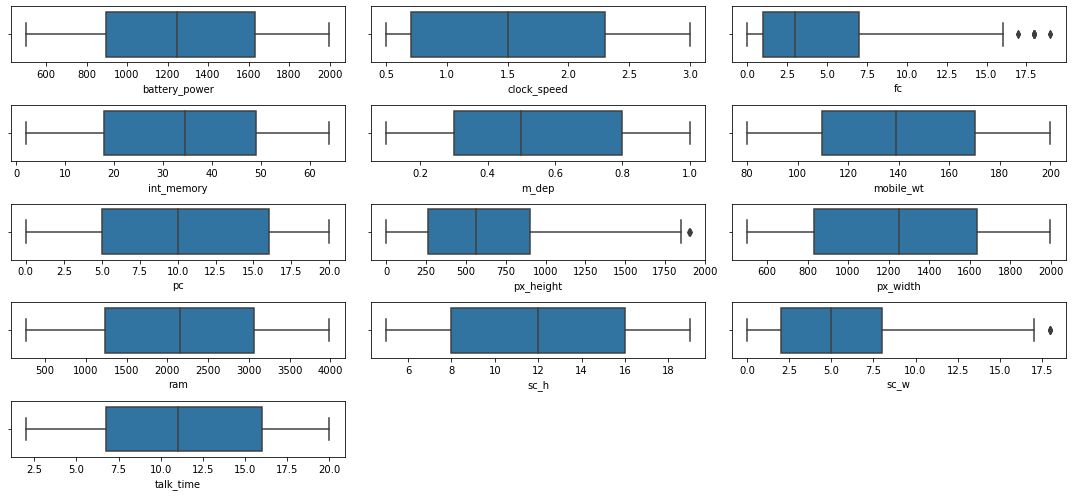

In [86]:
test_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(15, 7))
for i in range(0, len(test_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=test_data[test_col[i]],orient='v')
    plt.tight_layout()

There are outliers in the columns 'fc', px_height and 'sc_w'. Since these are genuine values we need not replace or remove it.

### Scaling

In [87]:
X=sc.fit_transform(test_data)

### Predicting price_range using Random Forest Classifier

In [88]:
#predicting price range
price_pred=rf_grid.predict(X)

In [89]:
# creating a copy of test dataset
pr_data=test_data.copy()

In [90]:
#Adding predicted values to the dataframe
pr_data['price_range']=price_pred

In [91]:
pr_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [92]:
#converting to csv file
pr_data.to_csv("predicted_dataset.csv",index=False)

### Ranking the new dataset

In [93]:
# Creating a copy of the pr_data
Rank_data=pr_data.copy()

In [94]:
#ranking features
col=['battery_power' ,'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep','n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
for i in col:
    Rank_data[i]=Rank_data[i].rank(method="dense",ascending="False")
Rank_data['mobile_wt']=Rank_data['mobile_wt'].rank(method="dense")
Rank_data['price_range']=Rank_data['price_range'].rank(method="dense")

In [95]:
# Sorting by rank of price_range
Rank_data.sort_values(by='price_range')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
601,614.0,2.0,11.0,2.0,3.0,1.0,29.0,2.0,3.0,1.0,...,186.0,467.0,192.0,9.0,7.0,12.0,1.0,1.0,2.0,1.0
226,573.0,1.0,1.0,1.0,2.0,2.0,53.0,4.0,52.0,5.0,...,556.0,524.0,29.0,9.0,13.0,4.0,2.0,2.0,1.0,1.0
224,547.0,2.0,1.0,1.0,5.0,2.0,52.0,4.0,83.0,4.0,...,157.0,396.0,30.0,8.0,8.0,18.0,2.0,2.0,2.0,1.0
223,706.0,1.0,24.0,1.0,1.0,1.0,3.0,8.0,14.0,8.0,...,566.0,455.0,137.0,1.0,2.0,13.0,1.0,2.0,1.0,1.0
849,387.0,1.0,11.0,2.0,7.0,1.0,63.0,2.0,67.0,8.0,...,419.0,497.0,22.0,2.0,2.0,11.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,234.0,2.0,5.0,1.0,6.0,1.0,5.0,6.0,84.0,6.0,...,422.0,567.0,820.0,4.0,8.0,17.0,1.0,1.0,1.0,4.0
764,652.0,1.0,1.0,2.0,1.0,2.0,46.0,1.0,6.0,7.0,...,22.0,593.0,543.0,10.0,14.0,18.0,2.0,1.0,2.0,4.0
348,187.0,2.0,1.0,2.0,3.0,1.0,26.0,3.0,113.0,2.0,...,494.0,522.0,741.0,5.0,5.0,13.0,1.0,2.0,1.0,4.0
352,102.0,1.0,1.0,2.0,11.0,2.0,3.0,8.0,111.0,5.0,...,124.0,231.0,806.0,8.0,8.0,19.0,2.0,2.0,2.0,4.0


The dataset has been ranked.

In [96]:
#converting to csv file
Rank_data.to_csv("Ranked_Dataset.csv",index=False)